In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from ta.trend import SMAIndicator, EMAIndicator
from ta.momentum import RSIIndicator
import backtrader as bt

In [2]:
pandas.set_option('display.max_rows', None)
data = pandas.read_csv('Data.csv')
data

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,symbol
0,2021-11-22 01:00:00,3.781,5.800,1.050,5.179,11057300.2,2021-11-23 00:59:59,5.604936e+07,180718,5611513.9,2.853705e+07,TSLA
1,2021-11-23 01:00:00,5.179,5.818,4.688,4.907,4146464.9,2021-11-24 00:59:59,2.147503e+07,69957,2083011.2,1.078152e+07,TSLA
2,2021-11-24 01:00:00,4.906,4.927,4.180,4.354,1729492.5,2021-11-25 00:59:59,7.741955e+06,24855,870766.2,3.897096e+06,TSLA
3,2021-11-25 01:00:00,4.362,4.946,4.234,4.268,2094587.7,2021-11-26 00:59:59,9.631339e+06,27137,1080292.3,4.989969e+06,TSLA
4,2021-11-26 01:00:00,4.267,4.433,3.759,3.842,1341030.5,2021-11-27 00:59:59,5.510113e+06,15789,666347.1,2.740108e+06,TSLA
5,2021-11-27 01:00:00,3.833,4.023,3.719,3.793,709578.9,2021-11-28 00:59:59,2.738648e+06,8835,340037.7,1.312927e+06,TSLA
6,2021-11-28 01:00:00,3.796,4.257,3.551,3.926,1348560.6,2021-11-29 00:59:59,5.267526e+06,21322,650219.6,2.542879e+06,TSLA
7,2021-11-29 01:00:00,3.926,4.435,3.885,4.223,970045.0,2021-11-30 00:59:59,4.054332e+06,18207,485512.6,2.028071e+06,TSLA
8,2021-11-30 01:00:00,4.215,4.770,3.852,4.633,2149068.7,2021-12-01 00:59:59,9.142256e+06,31233,1102946.4,4.704467e+06,TSLA
9,2021-12-01 01:00:00,4.631,5.499,4.579,4.762,8193602.4,2021-12-02 00:59:59,4.146645e+07,137268,4019275.0,2.036888e+07,TSLA


In [3]:
wtChannelLen = 9
wtAverageLen = 12

wtMASource = (data['high'] + data['low'] + data['close']) / 3
wtMALen = 3

# WaveTrend Overbought & Oversold lines

obLevel = 53
obLevel2 = 60
obLevel3 = 100
osLevel = -53
osLevel2 = -60
osLevel3 = -75

# Divergence WT

wtDivOBLevel = 45
wtDivOSLevel = -65

# Divergence extra range
wtDivOBLevel_add = 15
wtDivOSLevel_add = -40

rsiMFIperiod = 60
rsiMFIMultiplier = 150.
rsiMFIPosY = 2.5

# RSI
rsiSRC = data['close']
rsiLen = 14
rsiOversold = 30
rsiOverbought = 60

# Divergence RSI
rsiDivOBLevel = 60
rsiDivOSLevel = 30

# RSI Stochastic

stochSRC = data['close']
stochLen, stochRsiLen = 14, 14
stochKSmooth, stochDSmooth = 3, 3


# Schaff Trend Cycle

tcSRC = data['close']
tclength = 10
tcfastLength = 23
tcslowLength = 50
tcfactor = 0.5

# Sommi Flag

sommiVwapTF = '720'
sommiVwapBearLevel = 0
sommiVwapBullLevel = 0
soomiFlagWTBearLevel = 0
soomiFlagWTBullLevel = 0
soomiRSIMFIBearLevel = 0
soomiRSIMFIBullLevel = 0

# Sommi Diamond

sommiHTCRes = '60'
sommiHTCRes2 = '240'
soomiDiamondWTBearLevel = 0
soomiDiamondWTBullLevel = 0

# macd Colors

macdWTColorsTF = '240'

# Colors
'''lea variables suivantes '''
colorRed = "#ff0000"
colorPurple = "#e600e6"
colorGreen = "#3fff00"
colorOrange = "#e2a400"
colorYellow = "#ffe500"
colorWhite = "#ffffff"
colorPink = "#ff00f0"
colorBluelight = "#31c0ff"

colorWT1 = "#90caf9"
colorWT2 = "#0d47a1"

colorWT2_ = "#131722"

colormacdWT1a = "#4caf58"
colormacdWT1b = "#af4c4c"
colormacdWT1c = "#7ee57e"
colormacdWT1d = "#ff3535"

colormacdWT2a = "#305630"
colormacdWT2b = "#310101"
colormacdWT2c = "#132213"
colormacdWT2d = "#770000"

colorGreenLighter = "#66FF66"
colorRedDarker = "#8B0000"

wtShowDiv = True
wtGoldShow = True
stochShowDiv = False
rsiShowDiv = False

rsi1LengthInput = 100
rsi1SourceInput = data['close']
rsi2LengthInput = 25
rsi2SourceInput = data['close']
length = 10
DER_avg = 5
smooth = 3
vlookbk = 20
price = data['close']
v_calc = 'Relative'  # ou 'None', selon le besoin

In [4]:
def f_top_fractal(src):
    """
    La fonction f_top_fractal(src) en Pine Script est utilisée pour détecter
     un fractal supérieur dans notre base de donnees. Un fractal superieur
     est un motif qui indique un point haut local,
     où le sommet central est plus élevé que les deux sommets de chaque côté.
    """
    # Créez une série Pandas pour stocker les fractals supérieurs
    top_fractals = pandas.Series(index=src.index, dtype='bool')

    # Parcourez la série pour identifier les fractals supérieurs
    '''ici src[i] veut dire la donnee de src a l instant i, donc i+1 a l'instant i+1
    et i-1 l'instant precedent, dans cette boucle nous essayons de detecter un fractal superieur d'indice i
    en le comprant avec i-2, i-1, i+1 et i+2 '''
    for i in range(2, len(src) - 2):
        if src[i - 2] < src[i] and src[i - 1] < src[i] and src[i + 1] < src[i] and src[i + 2] < src[i]:
            top_fractals[i] = True
        else:
            top_fractals[i] = False

    return top_fractals

def f_bot_fractal(src):
    """
    La fonction f_bot_fractal(src) en Pine Script est utilisée pour détecter
     un fractal inferieure dans notre base de donnees. Un fractal inferieur
     est un motif qui indique un point bas local,
     où le creux central est plus bas que les deux sommets de chaque côté.
    """
    # Créez une série Pandas pour stocker les fractals supérieurs
    bot_fractals = pandas.Series(index=src.index, dtype='bool')

    # Parcourez la série pour identifier les fractals supérieurs
    for i in range(2, len(src) - 2):
        if src[i - 2] > src[i] and src[i - 1] > src[i] and src[i + 1] > src[i] and src[i + 2] > src[i]:
            bot_fractals[i] = True
        else:
            bot_fractals[i] = False

    return bot_fractals

def f_fractalize(src):
    # Calculez les fractals supérieurs et inférieurs en utilisant les fonctions précédentes
    top_fractals = f_top_fractal(src)
    bot_fractals = f_bot_fractal(src)

    # Initialisez une série pour stocker les résultats de la fractalisation
    fractalized = pandas.Series(index=src.index, dtype='int')

    # Attribuez 1 pour les fractals supérieurs, -1 pour les fractals inférieurs, et 0 sinon

    fractalized[bot_fractals] = -1
    fractalized[top_fractals] = 1
    fractalized[~top_fractals & ~bot_fractals] = 0

    return fractalized

def f_findDivs(src, topLimit, botLimit, useLimits):
    # Utilisez f_fractalize pour obtenir les fractals
    fractals = f_fractalize(src)

    # Initialisez les séries pour stocker les résultats
    fractalTop = pandas.Series(np.nan, index=src.index)
    fractalBot = pandas.Series(np.nan, index=src.index)
    bearSignal = pandas.Series(False, index=src.index)
    bullSignal = pandas.Series(False, index=src.index)
    bearDivHidden = pandas.Series(False, index=src.index)
    bullDivHidden = pandas.Series(False, index=src.index)

    # Identifiez les fractals supérieurs et inférieurs selon les seuils
    if useLimits:
        fractalTop[fractals > 0] = src.where(fractals > 0).where(src >= topLimit)
        fractalBot[fractals < 0] = src.where(fractals < 0).where(src <= botLimit)
    else:
        fractalTop[fractals > 0] = src.where(fractals > 0)
        fractalBot[fractals < 0] = src.where(fractals < 0)

    # Parcourez les fractals pour identifier les divergences en ignorant les indices qui renvoient na
    for i in fractalTop.dropna().index:
        #la fonction dropna() permet d exclure les indices qui representent nan
        indice_dropna = fractalTop.dropna().index

        if i > 4:  # s'assurer d'avoir assez de données pour comparer
            #on recupere le sommet local precedent ainsi que son prix
            #on commence tout d'abord par recuperer l indice precedent qui correspond a un sommet
            previous_i = i-1
            while ((previous_i not in indice_dropna) and previous_i > 0):
                previous_i -= 1
                #print(previous_i)
            highPrev = fractalTop[previous_i]
            highPrice = data['high'][previous_i]
            if src[i] < highPrev and data['high'][i] > highPrice:
                bearSignal[i] = True
            if src[i] > highPrev and data['high'][i] < highPrice:
                bearDivHidden[i] = True

    for i in fractalBot.dropna().index:
        if i > 4:
            previous_i = i - 1
            while (previous_i not in fractalBot.dropna().index  and previous_i > 0):
                previous_i -= 1
            lowPrev = fractalBot[previous_i]
            lowPrice = data['low'][previous_i]
            if src[i] > lowPrev and src[i - 2] < lowPrice:
                bullSignal[i] = True
            if src[i] < lowPrev and src[i - 2] > lowPrice:
                bullDivHidden[i] = True

    return fractalTop, fractalBot, lowPrev, bearSignal, bullSignal, bearDivHidden, bullDivHidden


def f_rsimfi(period, multiplier):
    valeur = ((data['close'] - data['open']) / (data['high'] - data['low'])) * multiplier
    sma = SMAIndicator(valeur, period).sma_indicator()

    return sma - rsiMFIPosY

#implementation de la fonction cross, on aura besoin
def cross(series1, series2):
    # Calculer la différence entre les deux séries
    diff = series1 - series2

    # Détecter les croisements en vérifiant les changements de signe
    '''shift permet de decaler les donnees '''
    cross = (diff.shift(1) * diff < 0)

    return cross

def f_wavetrend(src, chlen, avg, malen) :

    """on recopie tous les variables locales en premier lieu
    en ce qui cincerne les indicateur ema, sma on utilise
    directemenet les fcts predefinines dans la bibliotheque ta
    """
    esa = EMAIndicator(src, chlen).ema_indicator()
    de = EMAIndicator(abs(src - esa), chlen).ema_indicator()
    ci = (src - esa) / (0.015 * de)
    wt1 = EMAIndicator(ci, avg).ema_indicator()
    wt2 = SMAIndicator(wt1, malen).sma_indicator()
    wtVwap = wt1 - wt2
    wtOversold = wt2 <= osLevel
    wtOverbought = wt2 >= obLevel
    wtCross = cross(wt1, wt2)
    wtCrossUp = wt2 - wt1 <= 0
    wtCrossDown = wt2 - wt1 >= 0
    # Pour simuler wt1[2] et wt2[2] nous pouvons décaler les séries de deux périodes
    wt1_shifted = wt1.shift(2)
    wt2_shifted = wt2.shift(2)
    # Ensuite, appliquez la fonction cross sur les séries décalées
    wtCrosslast = cross(wt1_shifted, wt2_shifted)
    wtCrossUplast = wt2_shifted - wt1_shifted <= 0
    wtCrossDownlast = wt2_shifted - wt1_shifted >= 0

    return wt1, wt2, wtOversold, wtOverbought, wtCross, wtCrossUp, wtCrossDown, wtCrosslast, wtCrossUplast, wtCrossDownlast, wtVwap


def f_tc(src, length, fastLength, slowLength) :
    ema1 = EMAIndicator(src, fastLength).ema_indicator()
    ema2 = EMAIndicator(src, slowLength).ema_indicator()
    macdVal = ema1 - ema2
    '''.rolling() applique une fenêtre glissante sur une série de données
    et donc traite les donnees de longueur length avant l instant souhaite
    '''
    alpha = macdVal.rolling(window=length).min()
    beta = macdVal.rolling(window=length).max() - alpha
    gamma = (macdVal - alpha) / beta * 100
    delta = gamma.where(beta > 0, other=gamma.shift(1))
    for i in range(1, len(delta)):
        if pandas.isna(delta.iloc[i - 1]):
            # Si la valeur précédente de delta est NaN, on garde la valeur courante de delta
            continue
        else:
            # Sinon, on met à jour delta selon la formule
            delta.iloc[i] = delta.iloc[i - 1] + tcfactor * (gamma.iloc[i] - delta.iloc[i - 1])
    epsilon = delta.rolling(window=length).min()
    zeta = delta.rolling(window=length) - epsilon
    eta = (delta - epsilon) / zeta * 100
    stcReturn = eta.where(zeta > 0, other=eta.shift(1))
    #autre facon de transcrire cette ligne : stcReturn := na(stcReturn[1]) ? stcReturn : stcReturn[1] + tcfactor * (eta - stcReturn[1])
    stcReturn_shifted = stcReturn.shift(1)
    stcReturn_updated = stcReturn_shifted + tcfactor * (eta - stcReturn_shifted)
    stcReturn = stcReturn.where(stcReturn_shifted.isna(), other=stcReturn_updated)

    return stcReturn


def f_stochrsi(src, stochlen, rsilen, smoothk, smoothd) :
    src = np.log(src)
    rsi = RSIIndicator(src, rsilen).rsi()
    lowest_rsi = rsi.rolling(window=stochlen).min()
    highest_rsi = rsi.rolling(window=stochlen).max()
    stoch_rsi = 100 * (rsi - lowest_rsi) / (highest_rsi - lowest_rsi)
    kk = SMAIndicator(stoch_rsi, smoothk).sma_indicator()
    d1 = SMAIndicator(kk, smoothd).sma_indicator()

    return kk, d1

def f_macd(src, fastlen, slowlen, sigsmooth, tf) :
    fast_ma = EMAIndicator(src, fastlen).ema_indicator()
    slow_ma = EMAIndicator(src, slowlen).ema_indicator()
    macd = fast_ma - slow_ma
    signal = SMAIndicator(macd, sigsmooth).sma_indicator()
    hist = macd - signal
    return macd, signal, hist

#la fonction suivante ne servira a rien vu que colormacwtShow est en false donc c'est juste pour le code
def f_macdWTColors(tf) :
    hrsimfi = f_rsimfi(rsiMFIperiod, rsiMFIMultiplier)
    macd, signal, hist = f_macd(data['close'], 28, 42, 9, macdWTColorsTF)
    macdup = macd >= signal
    macddown = macd <= signal

    # Création d'une série pour stocker les couleurs
    macdWT1Color = pandas.Series(index=data['close'].index, dtype='object')
    macdWT1Color[macdup & (hrsimfi > 0)] = colormacdWT1c
    macdWT1Color[macdup & ~(hrsimfi > 0)] = colormacdWT1a
    macdWT1Color[macddown & (hrsimfi < 0)] = colormacdWT1d
    macdWT1Color[macddown & ~(hrsimfi < 0)] = colormacdWT1b

    macdWT2Color = pandas.Series(index=data['close'].index, dtype='object')  # De même pour macdWT2Color
    macdWT2Color[macdup & (hrsimfi < 0)] = colormacdWT2c
    macdWT2Color[macdup & ~(hrsimfi < 0)] = colormacdWT2a
    macdWT2Color[macddown & (hrsimfi < 0)] = colormacdWT2d
    macdWT2Color[macddown & ~(hrsimfi < 0)] = colormacdWT2b

    return macdWT1Color, macdWT2Color

def f_RelVol(_value, _length):
    """
    :param _value: pandas Series contenant les valeurs à analyser.
    :param _length: Entier définissant la longueur de la période pour le calcul.
    :return: pandas Series représentant le résultat normalisé de stochastique pour chaque point.
    """
    min_value = _value.rolling(window=_length).min()
    max_value = _value.rolling(window=_length).max()
    
    # Calcul de stochastique normalisée
    rel_vol = ((_value - min_value) / (max_value - min_value)) / 100
    
    return rel_vol

# Fonction pour calculer la moyenne mobile exponentielle (EMA) qui est similaire à rma dans Pine Script
def ema(series, length):
    return series.ewm(span=length, adjust=False).mean()

# Fonction pour calculer le changement d'une série (équivalent de 'change' dans Pine Script)
def change(series):
    return series.diff()

# Fonction pour calculer la moyenne mobile pondérée (WMA)
def wma(series, period):
    weights = np.arange(1, period + 1)
    return series.rolling(period).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

In [7]:
def main():
    '''Calcul des indices dans la fonction main :'''

    # RSI
    rsi = RSIIndicator(rsiSRC, rsiLen).rsi()

    # RSI + MFI Area
    rsiMFI = f_rsimfi(rsiMFIperiod, rsiMFIMultiplier)
    rsiMFIColor = np.where(rsiMFI > 0, "#3ee145", "#ff3d2e")

    # Calculates WaveTrend
    wt1, wt2, wtOversold, wtOverbought, wtCross, wtCrossUp, wtCrossDown, wtCross_last, wtCrossUp_last, wtCrossDown_last, wtVwap = f_wavetrend(wtMASource, wtChannelLen, wtAverageLen, wtMALen)

    # Stochastic RSI
    stochK, stochD = f_stochrsi(stochSRC, stochLen, stochRsiLen, stochKSmooth, stochDSmooth)

    # WT Divergences
    wtFractalTop, wtFractalBot, wtLow_prev, wtBearDiv, wtBullDiv, wtBearDivHidden, wtBullDivHidden = f_findDivs(wt2, wtDivOBLevel, wtDivOSLevel, True)

    wtFractalTop_add, wtFractalBot_add, wtLow_prev_add, wtBearDiv_add, wtBullDiv_add, wtBearDivHidden_add, wtBullDivHidden_add =  f_findDivs(wt2, wtDivOBLevel_add, wtDivOSLevel_add, True)
    wtFractalTop_nl, wtFractalBot_nl, wtLow_prev_nl, wtBearDiv_nl, wtBullDiv_nl, wtBearDivHidden_nl, wtBullDivHidden_nl =  f_findDivs(wt2, 0, 0, False)

    wtBearDivHidden_ = wtBearDivHidden_nl
    wtBullDivHidden_ = wtBullDivHidden_nl

    wtBearDivColor = np.where(wtBearDiv, colorRed, colorRed)
    wtBullDivColor = np.where(wtBullDiv, colorGreen,colorGreen )

    wtBearDivColor_add = np.where(wtBearDiv_add, "#9a0202", colorRed)
    wtBullDivColor_add = np.where(wtBullDiv_add, colorGreen, colorGreen)

    # RSI Divergences
    [rsiFractalTop, rsiFractalBot, rsiLow_prev, rsiBearDiv, rsiBullDiv, rsiBearDivHidden, rsiBullDivHidden] = f_findDivs(rsi, rsiDivOBLevel, rsiDivOSLevel, True)
    [rsiFractalTop_nl, rsiFractalBot_nl, rsiLow_prev_nl, rsiBearDiv_nl, rsiBullDiv_nl, rsiBearDivHidden_nl, rsiBullDivHidden_nl] = f_findDivs(rsi, 0, 0, False)

    rsiBearDivHidden_ = rsiBearDivHidden_nl
    rsiBullDivHidden_ = rsiBullDivHidden_nl

    rsiBearDivColor = None
    rsiBullDivColor = None

    #Stoch Divergences
    [stochFractalTop, stochFractalBot, stochLow_prev, stochBearDiv, stochBullDiv, stochBearDivHidden, stochBullDivHidden] = f_findDivs(stochK, 0, 0, False)
    stochBearDivColor = None
    stochBullDivColor = None

    # Small Circles WT Cross
    signalColor = np.where(wt2 - wt1 > 0, colorRed, colorGreen)

    # Buy signal.
    buySignal = wtCross & wtCrossUp & wtOversold

    buySignalDiv = (wtShowDiv & wtBullDiv) | (wtShowDiv & wtBullDiv_add) | (stochShowDiv & stochBullDiv) | (rsiShowDiv & rsiBullDiv)

    buySignalDiv_color = pandas.Series(colorWhite, index=wtBullDiv.index)

    buySignalDiv_color[wtBullDiv] = colorGreen
    buySignalDiv_color[~wtBullDiv & wtBullDiv_add] = colorGreenLighter
    buySignalDiv_color[~wtBullDiv & ~wtBullDiv_add & rsiShowDiv] = colorGreen

    # Sell signal
    sellSignal = wtCross & wtCrossDown & wtOverbought

    sellSignalDiv = (wtShowDiv & wtBearDiv) | (wtShowDiv & wtBearDiv_add) | (stochShowDiv & stochBearDiv) | (rsiShowDiv & rsiBearDiv)

    sellSignalDiv_color = pandas.Series(np.nan, index=wtBearDiv.index)

    sellSignalDiv_color[wtBearDiv] = colorRed
    sellSignalDiv_color[~wtBearDiv & wtBearDiv_add] = colorRedDarker
    sellSignalDiv_color[~wtBearDiv & ~wtBearDiv_add & rsiBearDiv] = colorRed

    # Gold Buy
    last_valid_index = wtFractalBot.last_valid_index()
    if last_valid_index is not None and (last_valid_index - 2 ) >= 0:
        lastRsi = rsi.iloc[last_valid_index - 2]
    else:
        lastRsi = np.nan

    wtGoldBuy = (wtBullDiv | (rsiShowDiv & rsiBullDiv)) & (wtLow_prev <= osLevel3) & (wt2 > osLevel3) & ((wtLow_prev - wt2) <= -5) & (lastRsi < 30)

    '''On trace maintenant les differents parametres et signux que nous avons calcule'''

    #Configuration initiale
    #crée une figure de taille 20x6 pouces avec un ensemble d'axes pour le tracé dans Matplotlib
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.axhline(y=0, color='white', alpha=0.5)

    # MFI BAR
    for i in range(1, len(data.index)):
        ax.fill_between(data.index[i - 1:i+1], -95, -99, color=rsiMFIColor[i], step='mid', alpha = 0.6)

    # WT Areas
    ax.plot(data.index, wt1, colorWT1, linewidth=2, alpha=1, label='WT Wave 1')
    ax.plot(data.index, wt2, colorWT2, linewidth=2, alpha=1, label='WT Wave 2')
    ax.fill_between(data.index, wt1, 0, color=colorWT1, step='post', alpha=1.0, label='WT Wave 1')
    ax.fill_between(data.index, wt2, 0, color=colorWT2, step='post', alpha=0.8, label='WT Wave 2')

    # VWAP
    ax.plot(data.index, wtVwap, color=colorYellow, linewidth=2, alpha=0.55, label='VWAP')
    ax.fill_between(data.index, wtVwap, 0, color=colorYellow, step='post', alpha=0.2, label='VWAP')

    # MFI Area
    for i in range(1, len(data.index)):
        ax.plot(data.index[i - 1:i+1], rsiMFI[ i - 1 : i + 1], 0, color=rsiMFIColor[i])
        ax.fill_between(data.index[i-1:i+1], rsiMFI[ i - 1 : i + 1 ], 0, color=rsiMFIColor[i], alpha = 0.6)

    # WT DIV
    """
    mask = wtFractalTop.notna()
    plt.plot(wt2[mask].index - 2, wt2[mask], marker='o', color="black", linestyle='None', linewidth=2)

    # WT 2nd Div
    for i in range(1, len(data.index)):
        ax.plot(data.index[i], wtFractalTop_add[i], 'o', color=wtBearDivColor_add[i], label='WT 2nd Bearish Divergence')
    for i in range(1, len(data.index)):
        ax.plot(data.index[i], wtFractalBot_add[i], 'o', color=wtBullDivColor_add[i], label='WT 2nd Bullish Divergence')

    series = np.where(wtFractalTop, wt2[2], np.nan)
    plt.plot(series, label='WT Bearish Divergence', color=wtBearDivColor, linewidth=2)

    """

    # Stochastic RSI
    ax.plot(data.index, stochK, label='Stoch K', color='#21baf3', linewidth=2)
    ax.plot(data.index, stochD, label='Stoch D', color='#673ab7', linewidth=1)
    fill_color = np.where(stochK >= stochD, '#21baf375', '#673ab760')
    ax.fill_between(data.index, stochK, stochD, where=stochK >= stochD, facecolor='#21baf375', interpolate=True, label='K over D')
    ax.fill_between(data.index, stochK, stochD, where=stochK < stochD, facecolor='#673ab760', interpolate=True, label='D over K')

    # Draw Overbought & Oversold lines
    ax.axhline(y=obLevel, color=colorWhite, alpha=0.85, label='Over Bought Level 1')
    ax.axhline(y=obLevel2, color=colorWhite, alpha=0.85, label='Over Bought Level 2')
    ax.axhline(y=obLevel3, color=colorWhite, alpha=0.95, label='Over Bought Level 3')
    ax.axhline(y=osLevel, color=colorWhite, alpha=0.85, label='Over Sold Level 1')
    ax.axhline(y=osLevel2, color=colorWhite, alpha=0.85, label='Over Sold Level 2')

    # Circles

    for i in range(len(data)):
        if wtCross[i]:
            ax.plot(data.index[i], wt2[i], 'o', color=signalColor[i], markersize=9, alpha=0.85)
        if buySignal[i]:
            ax.plot(data.index[i], -107, color=colorGreen, marker='o', alpha=0.5)
        if sellSignal[i]:
            ax.scatter(data.index[i], 105, color=colorRed, marker='o', alpha=0.5)
        if sellSignalDiv[i]:
            ax.scatter(data.index[i], 106, color=sellSignalDiv_color[i], marker='o', alpha=0.15,
                    label='Divergence Sell Circle')
        if wtGoldBuy[i]:
            ax.scatter(data.index[i], -106, color= colorOrange, linewidth = 2, marker='o', alpha=0.75,
                label='Cercle d\'achat doré')

   # Calcul du True Range (TR)
    data['previous_close'] = data['close'].shift(1)
    data['high_low'] = data['high'] - data['low']
    data['high_close'] = (data['high'] - data['previous_close']).abs()
    data['low_close'] = (data['low'] - data['previous_close']).abs()
    data['TrueRange'] = data[['high_low', 'high_close', 'low_close']].max(axis=1)

    # Calcul du Plus Directional Movement (DM+)
    data['high_diff'] = data['high'] - data['high'].shift(1)
    data['low_diff'] = data['low'].shift(1) - data['low']
    data['DirectionalMovementPlus'] = np.where(data['high_diff'] > data['low_diff'], data['high_diff'].clip(lower=0), 0)

    # Calcul du Minus Directional Movement (DM-)
    data['DirectionalMovementMinus'] = np.where(data['low_diff'] > data['high_diff'], data['low_diff'].clip(lower=0), 0)

    # Paramètre 'len' pour la moyenne mobile
    lenght = 14  # Taille de la fenêtre pour la moyenne mobile (exemple)

    # Calcul du Smoothed True Range et des Directional Movements
    data['SmoothedTrueRange'] = data['TrueRange'].rolling(window=lenght, min_periods=1).mean()  # Simplification par SMA
    data['SmoothedDirectionalMovementPlus'] = data['DirectionalMovementPlus'].rolling(window=lenght, min_periods=1).mean()  # Simplification par SMA
    data['SmoothedDirectionalMovementMinus'] = data['DirectionalMovementMinus'].rolling(window=lenght, min_periods=1).mean()  # Simplification par SMA

    # Calcul des indicateurs DI+ et DI-
    data['DIPlus'] = data['SmoothedDirectionalMovementPlus'] / data['SmoothedTrueRange'] * 100
    data['DIMinus'] = data['SmoothedDirectionalMovementMinus'] / data['SmoothedTrueRange'] * 100

    # Calcul de l'indice directionnel (DX) et de la moyenne mobile de l'ADX
    data['DX'] = (data['DIPlus'] - data['DIMinus']).abs() / (data['DIPlus'] + data['DIMinus']) * 100
    data['ADX'] = data['DX'].rolling(window=lenght, min_periods=1).mean()

    # Nettoyage du DataFrame
    data.drop(['previous_close', 'high_low', 'high_close', 'low_close', 'high_diff', 'low_diff'], axis=1, inplace=True)

    # Tracer l'ADX avec la couleur blanche 
    #plt.plot(data['ADX'], color='white', label='ADX') 
             
            
    #Signaux d'Achat et de Vente
    #ax.scatter(data.index[buySignal], -107*np.ones_like(data.index[buySignal]), color=colorGreen, marker='o', label='Buy Signal')
    #ax.scatter(data.index[sellSignal], 105*np.ones_like(data.index[sellSignal]), color=colorRed, marker='o', label='Sell Signal')

    """
    ax.scatter(data.index[buySignalDiv], -106*np.ones_like(data.index[buySignalDiv]), color=buySignalDiv_color, marker='o', label='Divergence Buy Signal')
    ax.scatter(data.index[sellSignalDiv], 106*np.ones_like(data.index[sellSignalDiv]), color=sellSignalDiv_color, marker='o', label='Divergence Sell Signal')
    """

################### suite du code principal ###############################################################
    for i in range(len(data)):
        if wtGoldBuy[i]:
            ax.scatter(data.index[i], -106, color = colorOrange, marker='o', alpha=0.15,
                    label='Gold  buy gold circle') 


    # Calculs des autres indicateurs 
    uprsi1 = ema(np.maximum(change(rsi1SourceInput), 0), rsi1LengthInput)
    downrsi1 = ema(-np.minimum(change(rsi1SourceInput), 0), rsi1LengthInput)

    uprsi2 = ema(np.maximum(change(rsi2SourceInput), 0), rsi2LengthInput)
    downrsi2 = ema(-np.minimum(change(rsi2SourceInput), 0), rsi2LengthInput)

    # Calcul du RSI modifié
    rsi1 = np.where(downrsi1 == 0, 100, np.where(uprsi1 == 0, 0, 100 - (100 / (1 + uprsi1 / downrsi1))))
    rsi2 = np.where(downrsi2 == 0, 100, np.where(uprsi2 == 0, 0, 100 - (100 / (1 + uprsi2 / downrsi2))))

    ######################################################
    if v_calc == 'None' or pandas.isna(data['volume']).any():
        vola = 1
    elif v_calc == 'Relative':
        vola = f_RelVol(data['volume'], vlookbk)
    else:
        vola = data['volume']
    ##############################################################

    R = (data['high'].rolling(window=2).max() - data['low'].rolling(window=2).min()) / 2
    sr = price.diff() / R
    rsr = np.clip(sr, -1, 1)
    c = rsr * vola
    c_plus = np.maximum(c, 0)
    c_minus = -np.minimum(c, 0)

    # Calcul des moyennes mobiles pondérées (WMA)
    dem = wma(c_plus, length) / wma(vola, length)
    sup = wma(c_minus, length) / wma(vola, length)

    adp = wma(dem, DER_avg)
    asp = wma(sup, DER_avg)

    anp = adp - asp
    anp_s = wma(anp, smooth)

    # Définition des couleurs
    c_adp = 'aqua'
    c_asp = 'orange'
    c_zero = 'yellow'
    c_fd = 'green'
    c_fs = 'red'
    c_up = '#33ff00'  # Couleur verte
    c_dn = '#ff1111'  # Couleur rouge
    #######################################################################
    up = anp_s >= 0
    
    # Afficher la grille pour une meilleure lisibilité
    plt.grid(True)

    # Pour mieux visualiser sur un fond sombre (comme la couleur blanche de l'ADX), vous pouvez définir le style du graphique
    plt.style.use('dark_background')       

    plt.show()

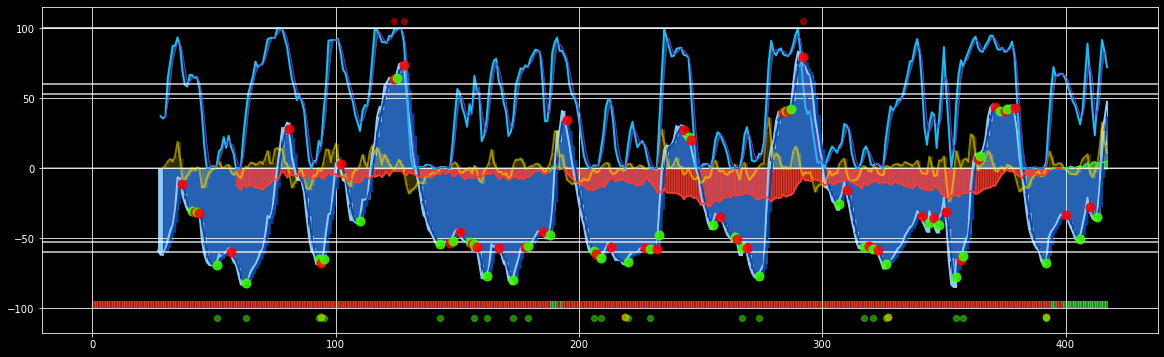

In [8]:
main()